#### An example about using matrix in solving problems.
$$
M = \begin{bmatrix}
0.9 & 0.3 \\
0.1 & 0.7 \\
\end{bmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Define this matrix in numpy

In [11]:
M = np.array([[0.9,0.3],[0.1,0.7]])
print(M)

[[0.9 0.3]
 [0.1 0.7]]


#### This matrix is conserved

In [38]:
print(M[0,0]+M[1,0]==1)
print(M[0,1]+M[1,1]==1)

True
True


#### Muliplied by itself 10 times

In [13]:
np.linalg.matrix_power(M,10)

array([[0.75151165, 0.74546504],
       [0.24848835, 0.25453496]])

#### 100 times!

In [14]:
np.linalg.matrix_power(M,100)

array([[0.75, 0.75],
       [0.25, 0.25]])

#### How does the muliplication result evolve.

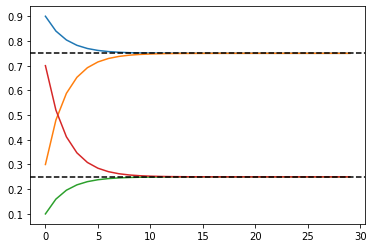

In [23]:
matrices = []
num = 30
for i in range(num):
    matrices.append(np.linalg.matrix_power(M,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.75,linestyle='--',c='k')
plt.axhline(y=0.25,linestyle='--',c='k')

#### A different plot

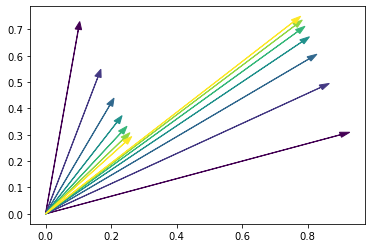

In [36]:
num_toplot = 7
colors=cm.viridis(np.linspace(0,1,num_toplot))
[plt.arrow(0,0,mat[0,0],mat[0,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]
[plt.arrow(0,0,mat[1,0],mat[1,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]

#### We define a new matrix which has one more constraint
$$
M = \begin{bmatrix}
1-\beta/2 & \beta/2 \\
\beta/2 & 1-\beta/2 \\
\end{bmatrix}$$

In [55]:
beta = 0.1
Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
print(Mbeta)

[[0.95 0.05]
 [0.05 0.95]]


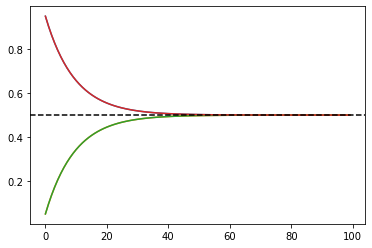

In [56]:
matrices = []
num = 100
for i in range(num):
    matrices.append(np.linalg.matrix_power(Mbeta,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.5,linestyle='--',c='k')

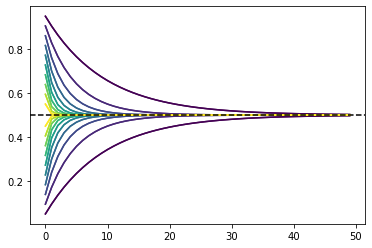

In [58]:
colors=cm.viridis(np.linspace(0,1,10))
for i, beta in enumerate(np.linspace(0.1,0.9,10)):
    color=colors[i]
    Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
    matrices = []
    num = 50
    for i in range(num):
        matrices.append(np.linalg.matrix_power(Mbeta,i+1))
    plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices],color=color)
plt.axhline(y=0.5,linestyle='--',c='k')

### HOW to build a scattering model with minimum inputs

In [14]:
from scatter import *

#### Tell the program how many and how intensive these various scattering events are.

In [15]:
num_alpha, num_beta, num_delta = 50, 50, 50
value_alpha, value_beta, value_delta = 0.2, 0.8, 0.1

#### The program generates a sequence of scattering events according to your order

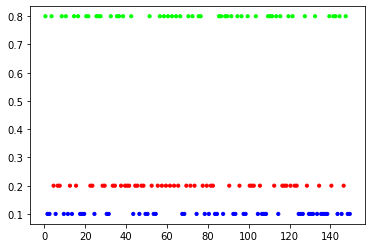

In [16]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=value_alpha, beta=value_beta, delta=value_delta)
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)

#### Be aware of the randomness in generating such a sequence

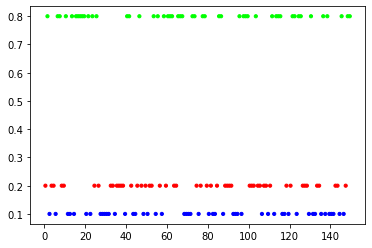

In [15]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=0.2, beta=0.8, delta=0.1)
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)

#### To observe closely how these scattering events changes the electrochemical potential of each edge states

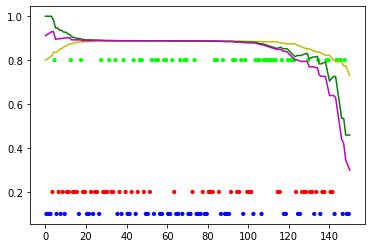

In [19]:
mu1_init, mu2_init, mu3_init = 0.8, 1, 0.3
init_state = [mu1_init, mu2_init, mu3_init]
states, _ = states_check(seq,init_state)
v1, v2, v3 = states[0,:],states[1,:],states[2,:]
plt.plot(v1,color='y')
plt.plot(v2,color='g')
plt.plot(v3,color='m')
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)
# [plt.axvline(x=pos+0.5,color=c,linestyle='-.') for pos,c in zip(np.arange(0, len(seq[:, 0]), 1),[[0, 1, 0] if t == 'A' else [1, 0, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]])]
plt.show()

#### Randomness induced by shuffling the scattering events in the sequence

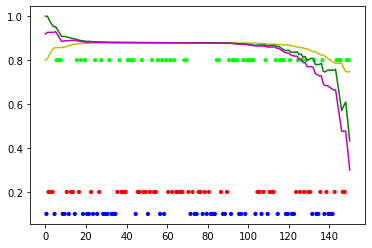

In [20]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=0.2, beta=0.8, delta=0.1)
states, _ = states_check(seq,init_state)
v1, v2, v3 = states[0,:],states[1,:],states[2,:]
plt.plot(v1,color='y')
plt.plot(v2,color='g')
plt.plot(v3,color='m')
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)
# [plt.axvline(x=pos+0.5,color=c,linestyle='-.') for pos,c in zip(np.arange(0, len(seq[:, 0]), 1),[[0, 1, 0] if t == 'A' else [1, 0, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]])]
plt.show()

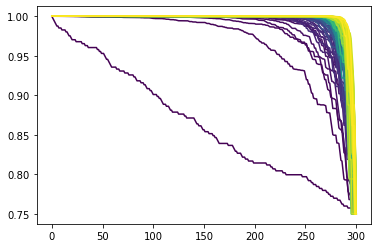

In [90]:
init_state = [1,1,0.5]
num_test = 100
scatter_num = 100
colors=iter(cm.viridis(np.linspace(0,1,num_test)))
for beta in np.linspace(0,1,num_test):
    color=next(colors)
    seq =  generate_bynumber(scatter_num, scatter_num, scatter_num, random_value=False, alpha=0, beta=beta, delta=0.99)
    states, _ = states_check(seq,init_state)
    v1, v2, v3 = states[0,:],states[1,:],states[2,:]
    plt.plot(v1/2+v2/2,color=color)
    # plt.plot(v2,color='g')
    # plt.plot(v3,color='m')
plt.show()

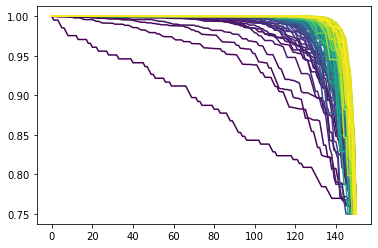

In [92]:
init_state = [1,1,0.5]
num_test = 100
scatter_num = 50
colors=iter(cm.viridis(np.linspace(0,1,num_test)))
for beta in np.linspace(0,1,num_test):
    color=next(colors)
    seq =  generate_bynumber(scatter_num, scatter_num, scatter_num, random_value=False, alpha=0, beta=beta, delta=0.99)
    states, _ = states_check(seq,init_state)
    v1, v2, v3 = states[0,:],states[1,:],states[2,:]
    plt.plot(v1/2+v2/2,color=color)
    # plt.plot(v2,color='g')
    # plt.plot(v3,color='m')
plt.show()

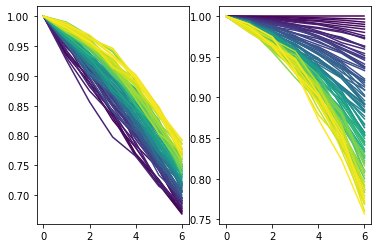

In [103]:
init_state = [1,1,0.5]
num_test = 100
scatter_num = 2
num_run = 50
colors=iter(cm.viridis(np.linspace(0,1,num_test)))

for beta in np.linspace(0,1,num_test):
    color=next(colors)
    v1, v2, v3 = [],[],[]
    for run_time in range(num_run):
        seq =  generate_bynumber(scatter_num, scatter_num, scatter_num, random_value=False, alpha=0, beta=beta, delta=0.99)
        states, _ = states_check(seq,init_state)
        vv1, vv2, vv3 = states[0,:],states[1,:],states[2,:]
        v1.append(vv1)
        v2.append(vv2)
        v3.append(vv3)
    plt.subplot(1,2,1)
    plt.plot(sum(v1)/num_run,color=color)
    plt.subplot(1,2,2)
    plt.plot(sum(v2)/num_run,color=color)
    # plt.plot(v2,color='g')
    # plt.plot(v3,color='m')
plt.show()

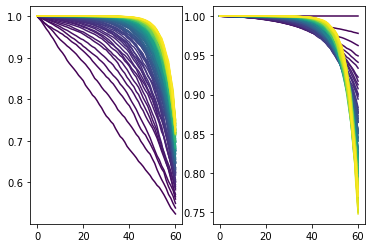

In [104]:
init_state = [1,1,0.5]
num_test = 100
scatter_num = 20
num_run = 50
colors=iter(cm.viridis(np.linspace(0,1,num_test)))

for beta in np.linspace(0,1,num_test):
    color=next(colors)
    v1, v2, v3 = [],[],[]
    for run_time in range(num_run):
        seq =  generate_bynumber(scatter_num, scatter_num, scatter_num, random_value=False, alpha=0, beta=beta, delta=0.99)
        states, _ = states_check(seq,init_state)
        vv1, vv2, vv3 = states[0,:],states[1,:],states[2,:]
        v1.append(vv1)
        v2.append(vv2)
        v3.append(vv3)
    plt.subplot(1,2,1)
    plt.plot(sum(v1)/num_run,color=color)
    plt.subplot(1,2,2)
    plt.plot(sum(v2)/num_run,color=color)
    # plt.plot(v2,color='g')
    # plt.plot(v3,color='m')
plt.show()

In [3]:
from allscatter import *

In [2]:
m, mf = 3, 2

message1 = [[0,2,0.8,5],[0,1,0.5,5]]
message2 = [[0,2,0.8,50],[0,1,0.5,50]]
message3 = [[0,2,0.8,5],[0,1,0.5,5]]
message4 = [[0,2,0.8,5],[0,1,0.5,5]]
message5 = [[0,2,0.8,50],[0,1,0.5,50]]
message6 = [[0,2,0.8,5],[0,1,0.5,5]]

messages = [message1,message2,message3,message4,message5,message6]
seqs = []
for message in messages:
    seqs.append(generate_bynumber(message))

matrices = []
for seq in seqs:
    matrices.append(effective_matrix(seq,m,mf))

In [3]:
matrices[0].trans_mat()

array([[0.134375  , 0.446875  , 0.41875   ],
       [0.13229167, 0.48645833, 0.38125   ],
       [0.73333333, 0.06666667, 0.2       ]])

In [4]:
matrices[0].get_seq()

array([[0. , 2. , 0.8],
       [0. , 2. , 0.8],
       [0. , 2. , 0.8],
       [0. , 1. , 0.5],
       [0. , 2. , 0.8],
       [0. , 2. , 0.8],
       [0. , 1. , 0.5],
       [0. , 1. , 0.5],
       [0. , 1. , 0.5],
       [0. , 1. , 0.5]])

In [5]:
current = [1,0,0,-1,0,0]
sys = system(current,matrices)

In [12]:
M = sys.mastermat(mf)
print(M)

[[ 1.43076923e+00 -2.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.23076923e+00]
 [-1.20000000e+00  1.20000737e+00 -7.37468548e-06  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000737e+00  1.19149674e+00 -1.91489362e-01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.19148936e+00  1.36624664e+00
  -1.74757282e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.17475728e+00
   1.17476738e+00 -1.00994995e-05]
 [-2.30769231e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.00001010e+00  1.23077933e+00]]


In [13]:
[print (M[:,i].sum()) for i in range(M.shape[0])]
[print (M[i,:].sum()) for i in range(M.shape[0])]

1.1102230246251565e-16
6.661338147750939e-16
2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-4.440892098500626e-16
2.220446049250313e-16
-3.981901885042466e-18
6.38378239159465e-16
-5.551115123125783e-17
-3.256672275603334e-17
-8.881784197001252e-16


[None, None, None, None, None, None]

In [21]:
v = sys.solve(2)
print(v[1]-v[5])
print(v[1]-v[2])
print(v-v[3])

0.8124988518295224
0.16071305523315682
[9.99999521e-01 9.99998533e-01 8.39285478e-01 0.00000000e+00
 1.61193863e-06 1.87499681e-01]


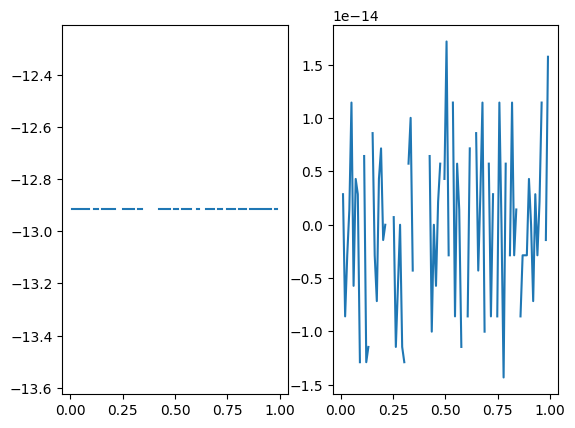

In [42]:
m, mf = 2,0

rxx = []
rxy = []
betas = np.linspace(0,1,100)
for beta in betas:
    delta = 0.99
    message1 = [[0,1,beta*0.95,2]]
    message2 = [[0,1,beta,30]]
    message3 = [[0,1,beta*0.95,2]]
    message4 = [[0,1,beta,2]]
    message5 = [[0,1,beta,30]]
    message6 = [[0,1,beta,2]]

    messages = [message1,message2,message3,message4,message5,message6]
    seqs = []
    for message in messages:
        seqs.append(generate_bynumber(message))

    matrices = []
    for seq in seqs:
        matrices.append(effective_matrix(seq,m,mf))

    current = [1,0,0,-1,0,0]
    sys = system(current,matrices)
    try:
        v = sys.solve(mf)
        rxy.append(25.831*(v[1]-v[5]))
        rxx.append(25.831*(v[1]-v[2]))
    except:
        rxy.append(None)
        rxx.append(None)
        
plt.subplot(1,2,1)
plt.plot(betas,rxy)
plt.subplot(1,2,2)
plt.plot(betas,rxx)